# Multilayer Perceptron
This is my first attempt to create a Neural Network using keras and Jupyter Notebook. We'll be using the MNIST database to classify handwritten digits.

## Imports
We must first import the necessary Python libraries.

In [118]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

## Load Data
Now let's load in the training mnist data.

In [110]:
num_classes = 10 # one class for each of the numbers 0-9

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("x_train shape is: ", x_train.shape)
print("y_train shape is: ", y_train.shape)

print("x_test shape is: ", x_test.shape)
print("y_test shape is: ", y_test.shape)


#save this for later
labels = y_test

x_train shape is:  (60000, 28, 28)
y_train shape is:  (60000,)
x_test shape is:  (10000, 28, 28)
y_test shape is:  (10000,)


Now let's actually see what our data looks like.

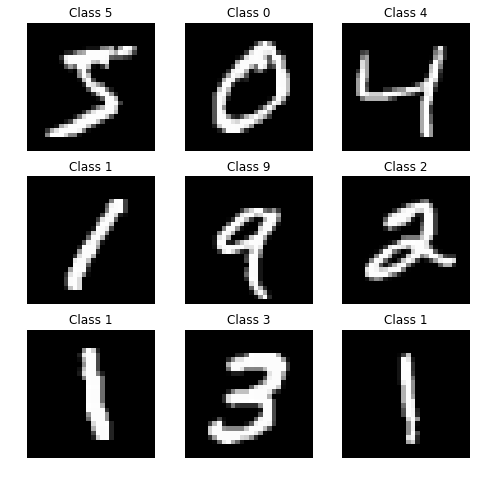

In [111]:
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.axis('off')
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

## Format Data
Before we build the model, there are a few formatting issues to take care of.

In [112]:
# Reshape data to 2-D
x_train = x_train.reshape(60000, 784) #298
x_test = x_test.reshape(10000, 784)

# Convert type to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize input data to values 0-1
x_train /= 255
x_test /= 255

# Convert labels to categories
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

## Build Model

Now let's actually create the MLP model.

In [113]:
# Create model
model = Sequential()

# Add first layer
model.add(Dense(256, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Add second layer
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Add third layer
model.add(Dense(10)) #for 10 classes
model.add(Activation('softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

## Train Model
And now fit the model.

In [114]:
model.fit(x_train, y_train, batch_size=128,
          epochs=5, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 89us/step - loss: 0.3141 - acc: 0.9062 - val_loss: 0.1293 - val_acc: 0.9615
Epoch 2/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.1259 - acc: 0.9617 - val_loss: 0.0819 - val_acc: 0.9745
Epoch 3/5
60000/60000 [==============================] - 5s 77us/step - loss: 0.0905 - acc: 0.9720 - val_loss: 0.0803 - val_acc: 0.9748
Epoch 4/5
60000/60000 [==============================] - 5s 80us/step - loss: 0.0716 - acc: 0.9772 - val_loss: 0.0650 - val_acc: 0.9797
Epoch 5/5
60000/60000 [==============================] - 5s 79us/step - loss: 0.0597 - acc: 0.9807 - val_loss: 0.0646 - val_acc: 0.9807


## Evaluate Model
Let's see how well our model performed.

In [115]:
score = model.evaluate(x_test, y_test)

print("Test score:", score[0])
print("Test accuracy:", score[1])

10000/10000 [==============================] - 1s 59us/step
Test score: 0.0645517371529364
Test accuracy: 0.9807


## Inspect Output
Finally, let's take a look at the ouput to make sure everything turned out all right.

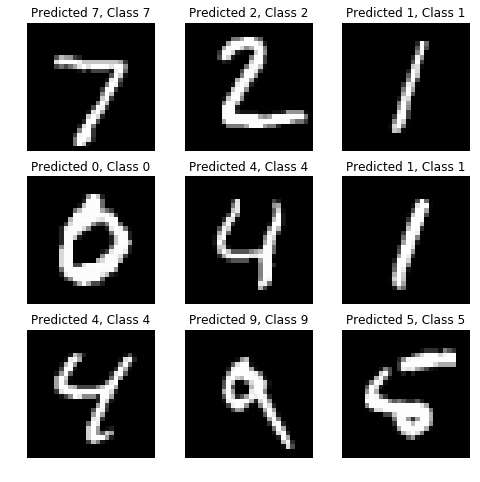

In [116]:
predictions = model.predict_classes(x_test)

plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.axis('off')
    plt.imshow(x_test[i].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predictions[i], labels[i]))
    

Pretty cool, right!

Let's also take a look at a couple that went wrong:

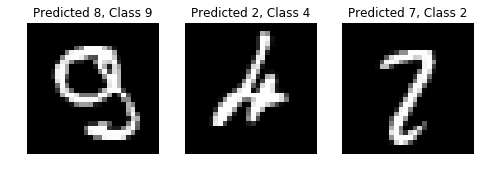

In [117]:
i, count = 0, 1

plt.figure(figsize=(8,8))
while count < 4 and i < 60000:
    if predictions[i] != labels[i]:
        plt.subplot(1,3,count)
        plt.axis('off')
        plt.imshow(x_test[i].reshape(28,28), cmap='gray', interpolation='none')
        plt.title("Predicted {}, Class {}".format(predictions[i], labels[i]))
        count += 1
    i += 1